<a href="https://colab.research.google.com/github/AbduzZami/ColabNotebooks/blob/main/Code_Former.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sczhou/CodeFormer
%cd CodeFormer


!pip install -r requirements.txt
!pip install dlib # Install dlib if needed


!python basicsr/setup.py develop


!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py dlib (only for dlib face detector)


!python scripts/download_pretrained_models.py CodeFormer

fatal: destination path 'CodeFormer' already exists and is not an empty directory.
/content/CodeFormer
/usr/local/lib/python3.11/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.11/dist-packages/setuptools/command/develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        stand

In [3]:
!pip install dlib
!pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [4]:
# !pip install Pillow==9.5.0

  Using cached Pillow-9.5.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached Pillow-9.5.0-cp311-cp311-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


In [1]:
# prompt: check pillow version

import PIL
PIL.__version__


'11.1.0'

In [2]:
# !python scripts/crop_align_face.py -i /content/inputs -o /content/outputs

python3: can't open file '/content/scripts/crop_align_face.py': [Errno 2] No such file or directory


In [17]:
#!/bin/bash
!kaggle datasets download abduzzami/deblurred-images-with-model-weights -p /content/data

Dataset URL: https://www.kaggle.com/datasets/abduzzami/deblurred-images-with-model-weights
License(s): apache-2.0
 96% 125M/131M [00:01<00:00, 111MB/s]
100% 131M/131M [00:01<00:00, 112MB/s]


In [18]:
# prompt: upzip  data

!unzip /content/data/deblurred-images-with-model-weights.zip -d /content/data


Archive:  /content/data/deblurred-images-with-model-weights.zip
  inflating: /content/data/best_weights.keras  
  inflating: /content/data/output_images/blurred_image1.png  
  inflating: /content/data/output_images/blurred_image10.png  
  inflating: /content/data/output_images/blurred_image100.png  
  inflating: /content/data/output_images/blurred_image101.png  
  inflating: /content/data/output_images/blurred_image102.png  
  inflating: /content/data/output_images/blurred_image103.png  
  inflating: /content/data/output_images/blurred_image104.png  
  inflating: /content/data/output_images/blurred_image105.png  
  inflating: /content/data/output_images/blurred_image106.png  
  inflating: /content/data/output_images/blurred_image107.png  
  inflating: /content/data/output_images/blurred_image108.png  
  inflating: /content/data/output_images/blurred_image109.png  
  inflating: /content/data/output_images/blurred_image11.png  
  inflating: /content/data/output_images/blurred_image110.pn

In [21]:
# prompt: copy images in /content/data/output_images to /content/inputs if filename starts with blurred

import os
import shutil

# Define source and destination directories
source_dir = "/content/data/output_images"
destination_dir = "/content/inputs"

# Check if the source directory exists
if not os.path.exists(source_dir):
  print(f"Source directory '{source_dir}' not found.")
else:
  # Iterate through files in the source directory
  for filename in os.listdir(source_dir):
    if filename.startswith("blurred"):
      source_path = os.path.join(source_dir, filename)
      destination_path = os.path.join(destination_dir, filename)

      # Copy the file
      try:
          shutil.copy2(source_path, destination_path)  # copy2 preserves metadata
          print(f"Copied '{filename}' to '{destination_dir}'")
      except FileNotFoundError:
          print(f"Error: File '{filename}' not found in source directory.")
      except Exception as e:
          print(f"Error copying '{filename}': {e}")


Copied 'blurred_image15.png' to '/content/inputs'
Copied 'blurred_image45.png' to '/content/inputs'
Copied 'blurred_image118.png' to '/content/inputs'
Copied 'blurred_image204.png' to '/content/inputs'
Copied 'blurred_image108.png' to '/content/inputs'
Copied 'blurred_image154.png' to '/content/inputs'
Copied 'blurred_image103.png' to '/content/inputs'
Copied 'blurred_image121.png' to '/content/inputs'
Copied 'blurred_image167.png' to '/content/inputs'
Copied 'blurred_image59.png' to '/content/inputs'
Copied 'blurred_image195.png' to '/content/inputs'
Copied 'blurred_image105.png' to '/content/inputs'
Copied 'blurred_image42.png' to '/content/inputs'
Copied 'blurred_image175.png' to '/content/inputs'
Copied 'blurred_image147.png' to '/content/inputs'
Copied 'blurred_image123.png' to '/content/inputs'
Copied 'blurred_image39.png' to '/content/inputs'
Copied 'blurred_image164.png' to '/content/inputs'
Copied 'blurred_image92.png' to '/content/inputs'
Copied 'blurred_image44.png' to '/con

In [22]:
!python inference_codeformer.py -w 0.5 --input_path /content/inputs/


/content/CodeFormer/inference_codeformer.py:141: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path)['params_ema']
Face detection model: retinaf

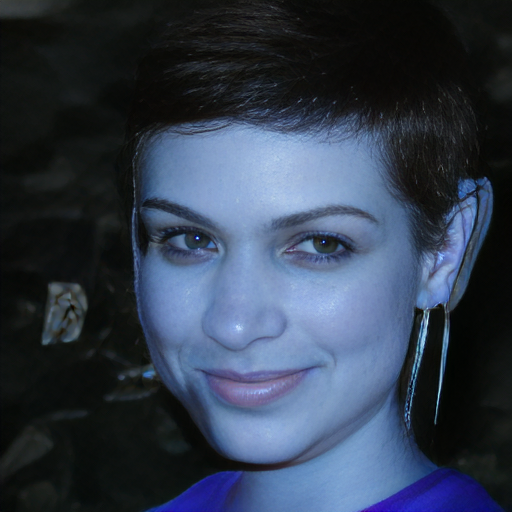

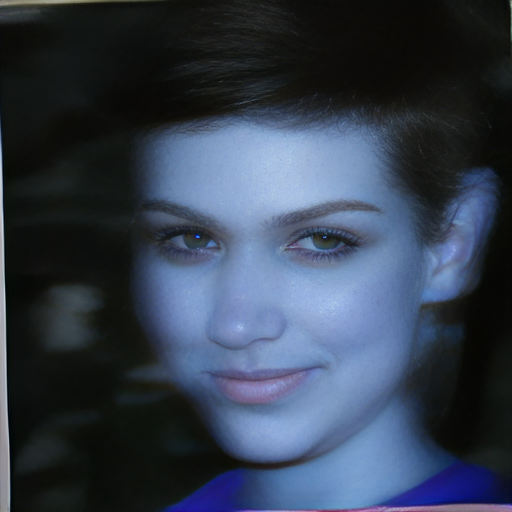

In [20]:
from IPython.display import Image, display
import glob

# Show all restored images
for img_path in glob.glob("results/test_img_0.5/restored_faces/*.png"):
    display(Image(img_path))


In [23]:
# prompt: zip and download the results folder

import shutil
import os

# Define the directory to zip
results_dir = "results"

# Create a zip archive of the results directory
shutil.make_archive("results", "zip", results_dir)

# Download the zip file
from google.colab import files
files.download("results.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>